# ME 7220 Assignment 2
Aidan Clark

Student No. 20191990

## Exercise 2.1

A car has an initial speed of $v_{max}$ (meters per second) and is located a distance $-p$ (meters) from a stopping location. If the car can produce a maximun deceleration of $d_{max}$ (meters per second squared), find the distance $s$ (meters) at which the brakes should be applied (as a function of $v_{max}$ and $d_{max}$) so that the car stops at the stopping line? Clearly state your assumptions.

Final position :  -0.3032172667947621  m



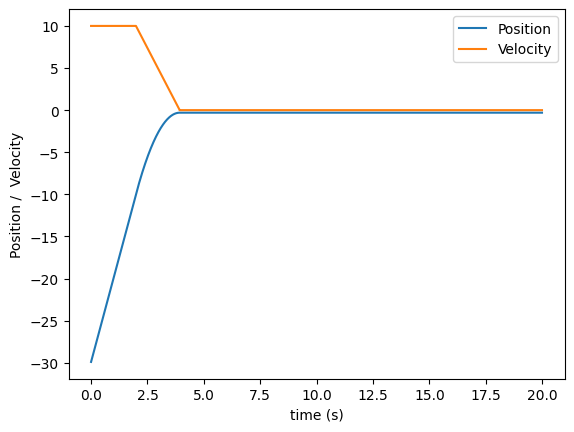

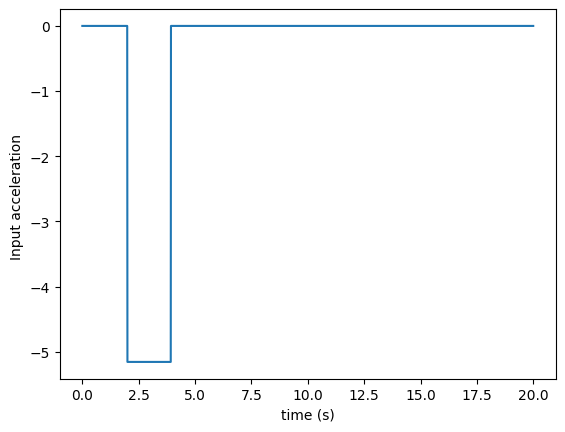

In [1]:
#@title #**Example 1: Openloop controller for pit stop** { run: "auto" }
#@markdown This simulator models the state propogation of vehicle approaching a pit stop. 
# A maximum deceleration of $d\sim \mathcal{N}(5,0.5)m/s^2$ is applied at a stopping distance predetermined by a controller. 
# Using the simulator given here determine a good stopping distance to appy the breaks through trial and error. 
# Is the simulation deterministic or stochastic? What is the initial condition of this simulation?

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

# We maintain the following numpy vectors  dx = f(x,u,t,param,w) , y = h(x,param,v)

# 1. initialization - init_parameters() -  #TODO by STUDENT : update initialization
dt = 0.01 ;sig_n_u = 0.5 ;sig_n_p = 0.5 ;sig_n_v = 0.005; t_end = 20.0; 
max_decel = 5 ;max_vel = 10.0  ; min_vel = 0.05  # Due to friction there is a minumum velocity that can be achieved
max_decel_act = max_decel  + abs(sig_n_u*np.random.randn()+0.3)
p0 = -30.0  #m
v0 = max_vel 
y_p0 = p0 + sig_n_p*np.random.randn()
y_v0 = v0 + sig_n_v*np.random.randn()
X = []; T= []; U =[]; Y=[]; # Variables for data acquisition

# these vectors are needed to define a system model
x = np.array([p0,v0]) # state vector - variables
y = np.array([y_p0,y_v0]) # measurment vector - variables
param = np.array([dt])  # the parameter vector - constants

stopping_distance = -(max_vel**2)/(2*max_decel)  # change this to get the result
stopping_distance = -10 #@param {type:"slider", min:-30, max:1, step:1.0}

# 2. Simulation  
for t in np.arange(0,t_end,dt):
  # Controller -  open loop pre compute
  if x[0]>stopping_distance and x[1]>min_vel:
    u_ref = -max_decel
    u_ref_act = -max_decel_act
  else:
    u_ref = 0.0 
    u_ref_act =0.0 
  
  u = u_ref_act

  # READ CURRENT STATE X
  p = x[0]
  v = x[1]
  a = u

  # Apply System model
  p = p + v*dt + 0.5*(a)*dt**2
  v = v + (a)*dt
  if abs(v) <= min_vel: # deadzone for velocity
    v=0.0

  # Apply Measurement model
  y_p = p + sig_n_p*np.random.randn()
  y_v = v + sig_n_v*np.random.randn()

  x = np.array([p,v])
  y = np.array([y_p,y_v])
  u = u
  
  #Data Aquisition
  X.append(x) 
  T.append(t)
  Y.append(y)
  U.append(u)

# 4. visualization functions
print("Final position : ", x[0], " m")
fig1= plt.figure()
p = plt.plot(T, X)
plt.xlabel('time (s)')
plt.ylabel('Position /  Velocity')
plt.gca().legend(('Position','Velocity'))


#fig1 = plt.figure()
#p = plt.plot(T, Y)

fig1 = plt.figure()
p = plt.plot(T, U)
plt.xlabel('time (s)')
plt.ylabel('Input acceleration ')
print()

## Exercise 2.2

Write a code to simulate a a vehicle odometer which is modeled using the following equation.
$$y_v=v +\eta~~~~ \\ \eta \sim \mathcal{N}(0,\sigma_v)$$

with $p=-30m$, $v=10m/s$ and $\sigma_v = 0.1 m/s $. Assuming that the velocity is not changing for 100 time steps, plot the output of the velocity sensor $y_v$ for the corresponding 100 time steps. 

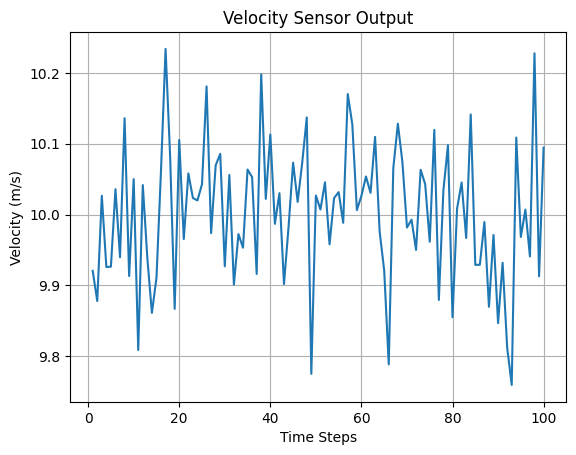

In [2]:
import numpy as np
import matplotlib.pyplot as plt

p = -30             #m
v = 10              #m/s
sigma_v = 0.1       #m/s 
time_steps = 100

eta = np.random.normal(0, sigma_v, time_steps)
y_v = v + eta

y_p = np.cumsum(y_v) + p

# Plot the velocity measurements
time = np.arange(1, time_steps + 1)
plt.plot(time, y_v)
plt.xlabel('Time Steps')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity Sensor Output')
plt.grid(True)
plt.show()

## Exercise 2.3

Using the simulation above comment on what happens to the system response (position and velocity tracking error) when each of the following parameters are changed.
 1. $K_p$
 2. $K_d$
 3. $K_i$

## Exercise 2.4

Consider the following LTI model and comment on
 
 \begin{equation} \begin{array}{c} 
\dot{\mathbf{x}} = A\mathbf{x} + B\mathbf{u} \\ 
\mathbf{y} = C\mathbf{x}
\end{array}\end{equation}

$$A=\begin{pmatrix}5 & 2 &2\\ 1 & 1 &0 \\ 1 & 2 &0\end{pmatrix}, ~B=\begin{pmatrix}1 & 0 \\ 0 & 0 \\0 &1 \end{pmatrix},~ C = I_3 $$

 a. Controlability of the model.

 b. Stability of the system with no inputs. (stability of the A matrix)

 c.Find stabilizing gains $K$ for the system 
 
 d.Plot the resulting response of all states for an arbitrary initial condition.

System is controllable.
System is not stable with no inputs.
Stabilizing gains K:
[[10.00000012 10.00000117  2.00028445]
 [ 1.00284455  2.00896034  1.99999988]]


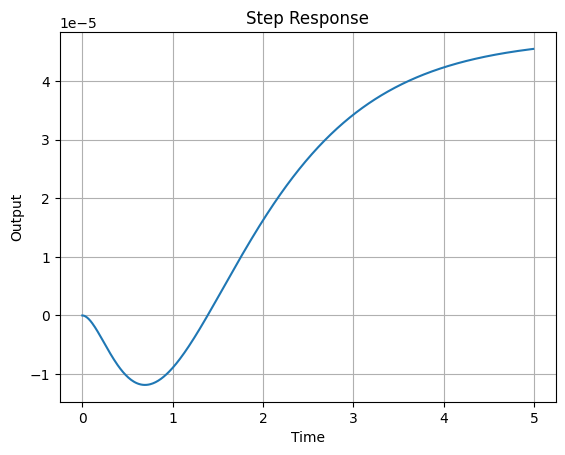

In [46]:
import numpy as np
import control
import matplotlib.pyplot as plt

# System matrices
A = np.array([[5, 2, 2], 
              [1, 1, 0], 
              [1, 2, 0]])

B = np.array([[1, 0],
              [0, 0], 
              [0, 1]])
              
C = np.eye(3)
D = np.zeros((3, 2))

# Create the state-space model
sys = control.ss(A, B, C, D)

# Check controllability
controllable = control.ctrb(A, B)
rank_controllable = np.linalg.matrix_rank(controllable)
if rank_controllable == A.shape[0]:
    print("System is controllable.")
else:
    print("System is not controllable.")

# Check stability
eigenvalues = np.linalg.eigvals(A)
if np.all(np.real(eigenvalues) < 0):
    print("System is stable with no inputs.")
else:
    print("System is not stable with no inputs.")

# Desired poles
desired_poles = [-1, -2, -3]

# Calculate stabilizing gains K
K = control.place(A, B, desired_poles)
print("Stabilizing gains K:")
print(K)

# Feedback system with state feedback control
closed_loop_sys = control.ss(A - B @ K, B, C, D)

# Time vector for simulation
dt = 0.01  # Time step
t = np.arange(0, 5, dt)  # Time span

# Input vector (step input)
u = np.ones_like(t)

# Simulate the response of the system
t_sim, y = control.step_response(closed_loop_sys, T=t, input=u)

# Extract the desired output for plotting
output_index = 0  # Choose the desired output index (0, 1, or 2)
y_output = np.squeeze(y[output_index])

# Plot the response
plt.plot(t_sim, y_output)
plt.xlabel('Time')
plt.ylabel('Output')
plt.title('Step Response')
plt.grid(True)
plt.show()

## Exercise 2.5

Express the model given in the previous Exercise 4 as a discrete model of the form:
$$\mathbf{x}_{k+1}=A_k\mathbf{x}_{k}+B_k\mathbf{u}_{k} \\
\mathbf{y}_{k}=C_k\mathbf{x}_{k}$$
Use a samplig time of $dt=0.001$. Comment on the stability of the discrete system with no inputs.

### Exercise 2.4 Model

\begin{equation} \begin{array}{c} 
\dot{\mathbf{x}} = A\mathbf{x} + B\mathbf{u} \\ 
\mathbf{y} = C\mathbf{x}
\end{array}\end{equation}

$$A=\begin{pmatrix}5 & 2 &2\\ 1 & 1 &0 \\ 1 & 2 &0\end{pmatrix}, ~B=\begin{pmatrix}1 & 0 \\ 0 & 0 \\0 &1 \end{pmatrix},~ C = I_3 $$

In [47]:
import numpy as np

# Define the continuous-time system matrices
A = np.array([[5, 2, 2],
              [1, 1, 0],
              [1, 2, 0]])

B = np.array([[1, 0],
              [0, 0],
              [0, 1]])

C = np.eye(3)

# Define the sampling time
dt = 0.001

# Discretize the continuous-time system
A_k = np.eye(3) + dt * A
B_k = dt * B
C_k = C

# Calculate the eigenvalues of A_k
eigenvalues = np.linalg.eigvals(A_k)
magnitude = np.abs(eigenvalues)

print("Discrete-time state matrix (A_k):\n", A_k)
print("\nDiscrete-time input matrix (B_k):\n", B_k)
print("\nDiscrete-time output matrix (C_k):\n", C_k)
print("\nEigenvalues of A_k:\n", eigenvalues)
print("\nMagnitude of eigenvalues:\n", magnitude)

Discrete-time state matrix (A_k):
 [[1.005e+00 2.000e-03 2.000e-03]
 [1.000e-03 1.001e+00 0.000e+00]
 [1.000e-03 2.000e-03 1.000e+00]]

Discrete-time input matrix (B_k):
 [[0.001 0.   ]
 [0.    0.   ]
 [0.    0.001]]

Discrete-time output matrix (C_k):
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Eigenvalues of A_k:
 [1.00588785+0.j         1.00005607+0.00058012j 1.00005607-0.00058012j]

Magnitude of eigenvalues:
 [1.00588785 1.00005624 1.00005624]


In [50]:
import numpy as np
from scipy import signal
from scipy.linalg import eigvals

##Define the continuous-time state-space model
A = np.array([[5, 2, 2], [1, 1, 0], [1, 2, 0]])
B = np.array([[1, 0], [0, 0], [0, 1]])
C = np.eye(3)
D = np.zeros((3, 2))

##Sampling time
dt = 0.1  # Adjust the sampling time as needed

##Convert to discrete-time model
discrete_sys = signal.cont2discrete((A, B, C, D), dt)

##Extract the discrete-time system matrices
Ak, Bk, Ck, Dd, dt = discrete_sys

##Print the discrete-time system matrices
print("Discrete-time system matrices:")
print("Ak:")
print(Ak)
print("Bk:")
print(Bk)
print("Ck:")
print(Ck)

print("Eigen values of AK:")
print(eigvals(Ak))

Discrete-time system matrices:
Ak:
[[1.6782428  0.29826649 0.26127746]
 [0.13680357 1.11869885 0.01232968]
 [0.14296841 0.22428844 1.01271947]]
Bk:
[[0.13063873 0.01193988]
 [0.00616484 0.00038979]
 [0.00635973 0.10039923]]
Ck:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Eigen values of AK:
[1.80179805+0.j         1.00393153+0.05830541j 1.00393153-0.05830541j]


In [49]:
import numpy as np

# Continuous-time matrices
A = np.array([[5, 2, 2],
              [1, 1, 0],
              [1, 2, 0]])

B = np.array([[1, 0],
              [0, 0],
              [0, 1]])

C = np.eye(3)

# Sampling time
dt = 0.001

# Discretize the system
A_k = np.eye(3) + dt * A
B_k = dt * B
C_k = C

print("Discrete-time state matrix A_k:")
print(A_k)
print()

print("Discrete-time input matrix B_k:")
print(B_k)
print()

print("Discrete-time output matrix C_k:")
print(C_k)
print()

# Check stability of the discrete system
eigenvalues = np.linalg.eigvals(A_k)
magnitude = np.abs(eigenvalues)

print("Eigenvalues of A_k:")
print(eigenvalues)
print()

print("Magnitude of eigenvalues:")
print(magnitude)
print()

if np.all(magnitude < 1):
    print("The discrete system is stable.")
else:
    print("The discrete system is unstable.")

Discrete-time state matrix A_k:
[[1.005e+00 2.000e-03 2.000e-03]
 [1.000e-03 1.001e+00 0.000e+00]
 [1.000e-03 2.000e-03 1.000e+00]]

Discrete-time input matrix B_k:
[[0.001 0.   ]
 [0.    0.   ]
 [0.    0.001]]

Discrete-time output matrix C_k:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Eigenvalues of A_k:
[1.00588785+0.j         1.00005607+0.00058012j 1.00005607-0.00058012j]

Magnitude of eigenvalues:
[1.00588785 1.00005624 1.00005624]

The discrete system is unstable.


## Exercise 2.6

Design an LQR controller to stabilize the model given in exercise 4 with  Q=10∗I3  and  R=1 . Plot the resulting tragectory of the system for an arbitrary initial condition.

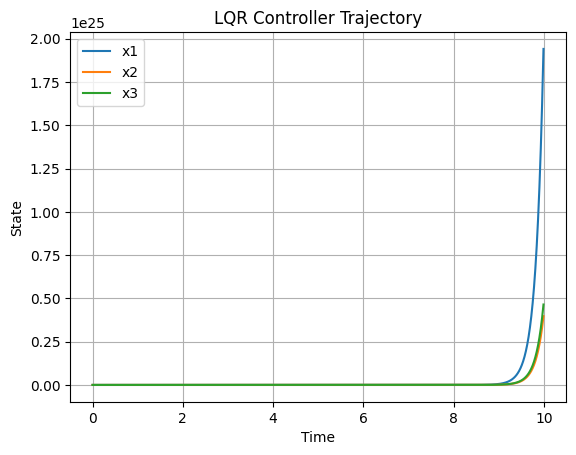

In [42]:
import numpy as np
import control
import matplotlib.pyplot as plt

# Define the system matrices
A = np.array([[5, 2, 2], [1, 1, 0], [1, 2, 0]])
B = np.array([[1, 0], [0, 0], [0, 1]])
C = np.eye(3)

# Define the weighting matrices
Q = 10 * np.eye(3)  # State weighting matrix
R = np.array([[1, 0], [0, 1]])  # Input weighting matrix

# Create the LQR controller
K, _, _ = control.lqr(A, B, Q, R)

# Create the state-space system
sys = control.ss(A, B, C, np.zeros((3, 2)))

# Define the simulation time
dt = 0.01  # Time step
t_sim = np.arange(0, 10, dt)  # Simulation time

# Define an arbitrary initial condition
x0 = np.array([1, 0, -1])  # Initial state

# Simulate the system using the LQR controller
t, y, x = control.forced_response(sys, T=t_sim, U=np.zeros((2, len(t_sim))), X0=x0, return_x=True)

# Plot the resulting trajectory
plt.figure()
plt.plot(t, y[0], label='x1')
plt.plot(t, y[1], label='x2')
plt.plot(t, y[2], label='x3')
plt.xlabel('Time')
plt.ylabel('State')
plt.legend()
plt.grid(True)
plt.title('LQR Controller Trajectory')
plt.show()

## Exercise 2.7

Consider the following linear system given in the code. Find a stabilizing LQR gain $K$ for the system by selecting a suitable Q and R Matrix. Tune the gains such that it achieve a settling time of less than 7 seconds. 

[[1.00000000e+00 1.73205081e+00 3.43313681e-17 7.79572669e-17]
 [1.30458439e-16 7.79572669e-17 1.00000000e+00 1.73205081e+00]]


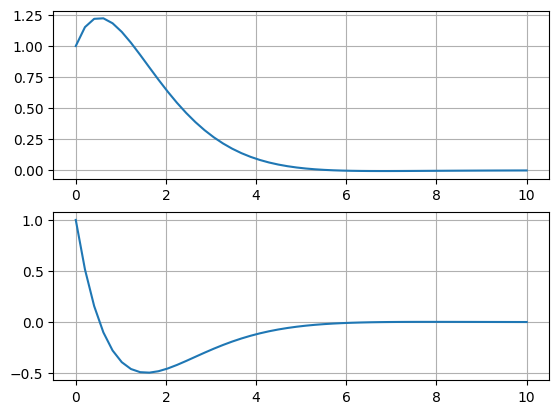

In [59]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

# The state space model
A= np.array([[0, 1.0, 0.0, 0.0],
             [0, 0,0,0],
             [0, 0,0,1],
             [0, 0,0,0]])
B= np.array([[0,0], 
             [1.0,0],
             [0,0], 
             [0,1.0]]);
C= np.eye(4);

#LQR Implementation
Q = np.eye(4)
R = np.eye(2)
Kc = ct.lqr(A,B,Q,R)[0]
print(Kc)


#the new autonoumous system becomes dx= (A-B*Kc)x
A_new= A - B @ Kc

sys = ct.ss(A_new,[0,0,0,0],C,0)  # Define the system 
T, yout =ct.initial_response(sys,np.linspace(0.0, 10.0, num=50),[1,1,1,1])  # simulate the system model
#for 7 seconds using an initial condition of (1,2)
fig, axs = plt.subplots(2, 1)
axs[0].plot(T,yout[0]);axs[0].grid()
axs[1].plot(T,yout[1]);axs[1].grid()

## Exercise 2.8

Using the simulation above establish the region of attraction for the system using trial and error. A hand drawing of the phase plane plot generated using trials of the simulator is sufficient. Please use states $p_x$ and $\theta$ as the x and y axis of the phase plane plot.

Comment on how are these initial conditions ( outside region of attraction) handled in application?

[[1.00000000e+00 1.73205081e+00 3.43313681e-17 7.79572669e-17]
 [1.30458439e-16 7.79572669e-17 1.00000000e+00 1.73205081e+00]]


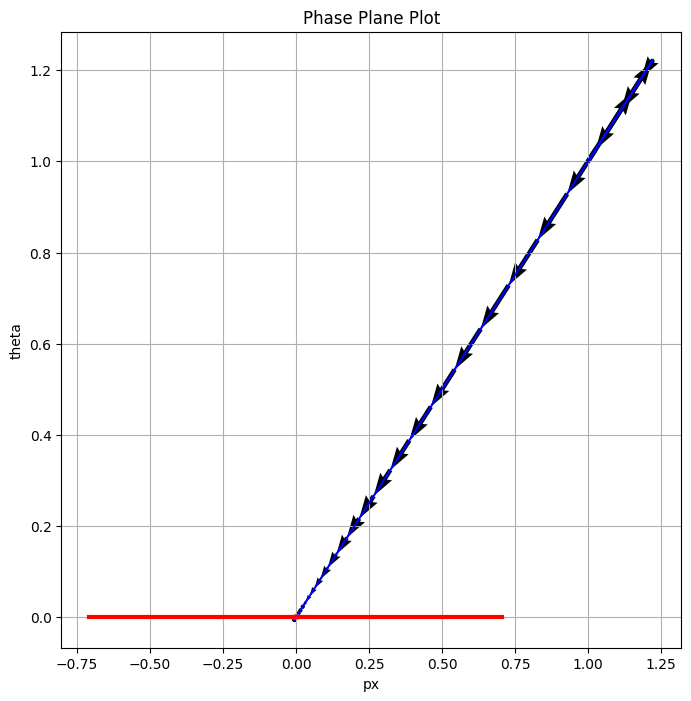

In [61]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt
from scipy import integrate

# The state space model
A = np.array([[0, 1.0, 0.0, 0.0],
              [0, 0, 0, 0],
              [0, 0, 0, 1],
              [0, 0, 0, 0]])
B = np.array([[0, 0],
              [1.0, 0],
              [0, 0],
              [0, 1.0]])
C = np.eye(4)

# LQR Implementation
Q = np.eye(4)
R = np.eye(2)
Kc = ct.lqr(A, B, Q, R)[0]
print(Kc)

# The new autonomous system becomes dx = (A - B @ Kc) * x
A_new = A - B @ Kc

def Sys(X, t=0):
    return A_new @ X

sys = ct.ss(A_new, [0, 0, 0, 0], C, 0)  # Define the system
T, yout = ct.initial_response(sys, np.linspace(0.0, 10.0, num=50), [1, 1, 1, 1])  # simulate the system model

# Phase Plane Plot
px_index = 0
theta_index = 2

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel("px")
ax.set_ylabel("theta")
ax.set_title("Phase Plane Plot")
ax.grid()

ax.plot(yout[px_index], yout[theta_index], color="blue")
ax.quiver(yout[px_index][:-1], yout[theta_index][:-1], yout[px_index][1:] - yout[px_index][:-1],
          yout[theta_index][1:] - yout[theta_index][:-1], scale_units='xy', angles='xy', scale=1)

eigenvalues, eigenvectors = np.linalg.eig(A_new)

X, infodict = integrate.odeint(Sys, eigenvectors.real[:, 0], T, full_output=True)
ax.plot(X[:, px_index], X[:, theta_index], color="yellow", linewidth=3.)
ax.plot(-X[:, px_index], -X[:, theta_index], color="yellow", linewidth=3.)

X, infodict = integrate.odeint(Sys, eigenvectors.real[:, 1], T, full_output=True)
ax.plot(X[:, px_index], X[:, theta_index], color="red", linewidth=3.)
ax.plot(-X[:, px_index], -X[:, theta_index], color="red", linewidth=3.)

plt.show()
